In [1]:
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import pandas as pd

In [2]:
def encoding(dataFrame):
    
    labels = ['P'+str(i) for i in range(22)]
    labels[0] = labels[0]+str(0)

    val_dict = {}
    for item in labels:
        val_dict[item] = list()

    l = list()
    for item in dataFrame:
        l.append(item)

    unwanted = ["[", "]", "'", ","]
    for i in unwanted:
        for j in range(len(l)):
            l[j] = l[j].replace(i,'')

    for i in range(len(l)):
        l[i] = l[i].split()

    for item in l:
        for key in val_dict:
            if key in item:
                val_dict[key].append(1)
            else:
                val_dict[key].append(0)

    return pd.DataFrame(val_dict)

In [3]:
df = pd.read_csv('train_go05W65.csv')

df_Product_Holding_B1 = encoding(df['Product_Holding_B1'])
Ydf = encoding(df['Product_Holding_B2'])

Xdf = df.drop(['Customer_ID', 'Product_Holding_B1', 'Product_Holding_B2'], axis=1)
Xdf = pd.concat([Xdf, df_Product_Holding_B1], axis=1)

X = Xdf.values
y = Ydf.values

In [4]:
print(X)

[['Male' 41 14 ... 0 0 0]
 ['Female' 47 14 ... 0 1 0]
 ['Female' 59 14 ... 0 0 0]
 ...
 ['Male' 44 26 ... 0 0 0]
 ['Female' 56 15 ... 0 0 0]
 ['Male' 29 13 ... 0 0 0]]


In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0, 4, 5])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

X = X.astype(np.float64)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 7:9] = sc.fit_transform(X_train[:, 7:9])
X_test[:, 7:9] = sc.transform(X_test[:, 7:9])

In [8]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
def get_model(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(512, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(n_outputs, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
    return model

In [ ]:
from numpy import mean
from numpy import std
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedKFold

In [ ]:
# n_inputs, n_outputs = X.shape[1], y.shape[1]
# model = get_model(n_inputs, n_outputs)
# history = model.fit(X_train, y_train, verbose=1, epochs=500)
# yhat = model.predict(X_test)
# yhat = yhat.round()
# ap = accuracy_score(y_test, yhat)
# print('>%.3f' % ap)

Epoch 1/500
944/944 [==============================] - 7s 5ms/step - loss: 0.1284 - acc: 0.4109
Epoch 2/500
944/944 [==============================] - 4s 5ms/step - loss: 0.1159 - acc: 0.4405
Epoch 3/500
944/944 [==============================] - 4s 4ms/step - loss: 0.1133 - acc: 0.4480
Epoch 4/500
944/944 [==============================] - 4s 4ms/step - loss: 0.1117 - acc: 0.4528
Epoch 5/500
944/944 [==============================] - 4s 4ms/step - loss: 0.1104 - acc: 0.4554
Epoch 6/500
944/944 [==============================] - 4s 4ms/step - loss: 0.1095 - acc: 0.4569
Epoch 7/500
944/944 [==============================] - 4s 4ms/step - loss: 0.1084 - acc: 0.4598
Epoch 8/500
944/944 [==============================] - 4s 4ms/step - loss: 0.1071 - acc: 0.4624
Epoch 9/500
944/944 [==============================] - 4s 4ms/step - loss: 0.1059 - acc: 0.4647
Epoch 10/500
944/944 [==============================] - 4s 4ms/step - loss: 0.1046 - acc: 0.4695
Epoch 11/500
944/944 [=================

<Figure size 432x288 with 0 Axes>

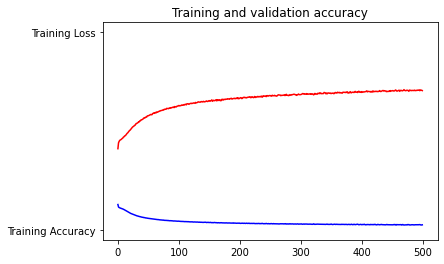

<Figure size 432x288 with 0 Axes>

In [ ]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
# val_acc=history.history['val_acc']
loss=history.history['loss']
# val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
# plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.plot(epochs, loss, 'b', "Training Loss")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
# plt.plot(epochs, loss, 'r', "Training Loss")
# plt.plot(epochs, val_loss, 'b', "Validation Loss")


# plt.title('Training and validation loss')

In [ ]:
def evaluate_model(X, y):
    results = list()
    n_inputs, n_outputs = X.shape[1], y.shape[1]
    # define evaluation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # enumerate folds
    for train_ix, test_ix in cv.split(X):
        # prepare data
        X_train, X_test = X[train_ix], X[test_ix]
        y_train, y_test = y[train_ix], y[test_ix]
        # define model
        model = get_model(n_inputs, n_outputs)
        # fit model
        model.fit(X_train, y_train, verbose=1, epochs=2)
        # make a prediction on the test set
        yhat = model.predict(X_test)
        # round probabilities to class labels
        yhat = yhat.round()
        # calculate accuracy
        acc = accuracy_score(y_test, yhat)
        # store result
        print('>%.3f' % acc)
        results.append(acc)
    return results

In [ ]:
# evaluate model
results = evaluate_model(X, y)
# summarize performance
print('Accuracy: %.3f (%.3f)' % (mean(results), std(results)))

Epoch 1/2
1062/1062 [==============================] - 5s 4ms/step - loss: 0.1655 - acc: 0.3225
Epoch 2/2
1062/1062 [==============================] - 5s 4ms/step - loss: 0.1266 - acc: 0.4185
>0.244
Epoch 1/2
1062/1062 [==============================] - 5s 4ms/step - loss: 0.1657 - acc: 0.3247
Epoch 2/2
1062/1062 [==============================] - 5s 4ms/step - loss: 0.1273 - acc: 0.4171
>0.289
Epoch 1/2
1062/1062 [==============================] - 5s 4ms/step - loss: 0.1671 - acc: 0.3259
Epoch 2/2
1062/1062 [==============================] - 5s 4ms/step - loss: 0.1272 - acc: 0.4138
>0.237
Epoch 1/2
1062/1062 [==============================] - 5s 4ms/step - loss: 0.1676 - acc: 0.3182
Epoch 2/2
1062/1062 [==============================] - 5s 4ms/step - loss: 0.1266 - acc: 0.4187
>0.254
Epoch 1/2
1062/1062 [==============================] - 5s 4ms/step - loss: 0.1673 - acc: 0.3209
Epoch 2/2
1062/1062 [==============================] - 5s 5ms/step - loss: 0.1283 - acc: 0.4122
>0.292
Epoch